In [1]:
import re
import nltk
import csv
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')
import numpy as np

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


1.1 Представьте первое предложение из строки text как последовательность из индексов слов, входящих в это предложение

In [2]:
text = '''Select your preferences and run the install command. Stable represents 
        the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'''

# Токенизация текста на предложения
sentences = nltk.sent_tokenize(text)

# Токенизация первого предложения на слова
words = re.findall(r'\w+', sentences[0])

# Получение индексов слов
word_indexes = [words.index(word) for word in words]

print(word_indexes)


[0, 1, 2, 3, 4, 5, 6, 7]


1.2 Представьте первое предложение из строки text как последовательность векторов, соответствующих индексам слов. Для представления индекса в виде вектора используйте унитарное кодирование. В результате должен получиться двумерный тензор размера количество слов в предложении x количество уникальных слов

In [3]:
import nltk
import numpy as np

text = '''Select your preferences and run the install command. Stable represents 
        the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'''

# Токенизация текста на предложения
sentences = nltk.sent_tokenize(text)

# Токенизация первого предложения на слова
words = re.findall(r'\w+', sentences[0])

# Получение уникальных слов и их количество
unique_words = list(set(words))
num_unique_words = len(unique_words)

# Создание двумерного тензора с унитарным кодированием
tensor = np.zeros((len(words), num_unique_words))

for i, word in enumerate(words):
    word_index = unique_words.index(word)
    tensor[i, word_index] = 1

print(tensor)
print(tensor.shape)


[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
(8, 8)


Решите задачу 1.2, используя модуль nn.Embedding

In [5]:
text = '''Select your preferences and run the install command. Stable represents 
        the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'''

sentences = nltk.sent_tokenize(text)

words = re.findall(r'\w+', sentences[0])

unique_words = list(set(words))
word_to_index = {word: i for i, word in enumerate(unique_words)}

embedding_dim = 8

embedding = nn.Embedding(len(unique_words), embedding_dim)

# Преобразование предложения в последовательность индексов слов
word_indices = [word_to_index[word] for word in words]
sentence_tensor = torch.LongTensor(word_indices)

# Применение nn.Embedding к тензору с индексами слов
embedded_sentence = embedding(sentence_tensor)

print(embedded_sentence)
print(embedded_sentence.shape)


tensor([[ 1.7532,  0.4804,  0.4889, -1.2871,  0.1566,  0.6071,  0.3816, -0.5707],
        [ 0.7713,  0.2603, -2.1896, -0.2085,  2.1461,  0.0515,  1.2535,  0.5923],
        [-0.5541, -0.0046, -0.0056,  1.3751,  1.5108, -0.9785,  0.9830, -0.0354],
        [ 0.0687, -0.2976,  0.3386, -1.9332, -0.4103,  0.3559,  1.8193, -1.0449],
        [ 1.3989, -0.6882,  2.2559,  1.3477,  0.4557,  0.9221, -0.3692,  1.6240],
        [ 0.6413, -0.6287, -1.3973, -1.1915, -0.7227, -0.9074,  0.6591, -0.8851],
        [-0.1935, -0.6889,  0.5122,  0.3420,  0.7153,  0.6352, -1.1574,  0.9097],
        [ 0.1564,  0.5434,  0.7299,  1.2432,  0.6966, -1.2223,  1.9811,  0.7974]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([8, 8])


2. Классификация фамилий по национальности (ConvNet)
Датасет: https://disk.yandex.ru/d/owHew8hzPc7X9Q?w=1

2.1 Считать файл surnames/surnames.csv.

In [6]:
surnames = []
nationalities = []
with open('surnames.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        surnames.append(row['surname'])
        nationalities.append(row['nationality'])
nationalities

['English',
 'French',
 'English',
 'Arabic',
 'Russian',
 'Japanese',
 'Arabic',
 'Chinese',
 'Italian',
 'Arabic',
 'Russian',
 'English',
 'Russian',
 'Czech',
 'Russian',
 'Japanese',
 'Italian',
 'Irish',
 'Arabic',
 'German',
 'Russian',
 'Arabic',
 'Russian',
 'English',
 'English',
 'Italian',
 'Czech',
 'Czech',
 'English',
 'German',
 'Arabic',
 'Czech',
 'Arabic',
 'English',
 'Chinese',
 'English',
 'English',
 'Japanese',
 'English',
 'Japanese',
 'Arabic',
 'English',
 'Arabic',
 'Arabic',
 'Russian',
 'Arabic',
 'Arabic',
 'Russian',
 'Chinese',
 'Arabic',
 'Japanese',
 'English',
 'Czech',
 'Greek',
 'Italian',
 'Italian',
 'Arabic',
 'Chinese',
 'Russian',
 'English',
 'Italian',
 'English',
 'English',
 'German',
 'Russian',
 'Russian',
 'Greek',
 'Russian',
 'Arabic',
 'Spanish',
 'German',
 'Russian',
 'Arabic',
 'Polish',
 'Dutch',
 'Arabic',
 'English',
 'Czech',
 'German',
 'Russian',
 'English',
 'Italian',
 'Czech',
 'English',
 'Russian',
 'Russian',
 'Arabic'

2.2 Закодировать национальности числами, начиная с 0.

In [7]:
label_encoder = LabelEncoder()

encoded_nationalities = label_encoder.fit_transform(nationalities)

# Вывод закодированных национальностей
for surname, encoded_nationality in zip(surnames, encoded_nationalities):
    print(f"Surname: {surname}, Encoded Nationality: {encoded_nationality}")

Surname: Woodford, Encoded Nationality: 4
Surname: CotГ©, Encoded Nationality: 5
Surname: Kore, Encoded Nationality: 4
Surname: Koury, Encoded Nationality: 0
Surname: Lebzak, Encoded Nationality: 14
Surname: Obinata, Encoded Nationality: 10
Surname: Rahal, Encoded Nationality: 0
Surname: Zhuan, Encoded Nationality: 1
Surname: Acconci, Encoded Nationality: 9
Surname: Mifsud, Encoded Nationality: 0
Surname: Chekhoev, Encoded Nationality: 14
Surname: Essop, Encoded Nationality: 4
Surname: Rosenbloom, Encoded Nationality: 14
Surname: Michalovicova, Encoded Nationality: 2
Surname: Valendik, Encoded Nationality: 14
Surname: Ishinomori, Encoded Nationality: 10
Surname: Colombo, Encoded Nationality: 9
Surname: Gallchobhar, Encoded Nationality: 8
Surname: Srour, Encoded Nationality: 0
Surname: Strobel, Encoded Nationality: 6
Surname: Lysihin, Encoded Nationality: 14
Surname: Boulos, Encoded Nationality: 0
Surname: Mnatsakanyan, Encoded Nationality: 14
Surname: Jefferson, Encoded Nationality: 4


2.3 Разбить датасет на обучающую и тестовую выборку

In [8]:
train_surnames, test_surnames, train_nationalities, test_nationalities = train_test_split(
    surnames, nationalities, test_size=0.2, random_state=42)

# Вывод размеров обучающей и тестовой выборок
print(f"Train set size: {len(train_surnames)}")
print(f"Test set size: {len(test_surnames)}")

Train set size: 8784
Test set size: 2196


2.4 Реализовать класс Vocab (токен = символ)

добавьте в словарь специальный токен <PAD> с индексом 0
при создании словаря сохраните длину самой длинной последовательности из набора данных в виде атрибута max_seq_len

In [9]:
max_seq_len = 0

class Vocab:
    def __init__(self):
        self.token_to_idx = {}
        self.idx_to_token = []

        self.add_token('<PAD>')

    def add_token(self, token):
        if token not in self.token_to_idx:
            self.token_to_idx[token] = len(self.idx_to_token)
            self.idx_to_token.append(token)

    def token_to_index(self, token):
        return self.token_to_idx.get(token, self.token_to_idx['<PAD>']) 

    def index_to_token(self, index):
        if 0 <= index < len(self.idx_to_token):
            return self.idx_to_token[index]
        return None

    def __len__(self):
        return len(self.idx_to_token)

vocab = Vocab()

with open('surnames.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        surname = row['surname']
        
        max_seq_len = max(max_seq_len, len(surname))

        for char in surname:
            vocab.add_token(char)

# Вывод максимальной длины последовательности и размера словаря
print(f"Max sequence length: {max_seq_len}")
print(f"Vocab size: {len(vocab)}")


Max sequence length: 17
Vocab size: 87


2.5 Реализовать класс SurnamesDataset

метод __getitem__ возвращает пару: <последовательность индексов токенов (см. 1.1 ), номер класса>
длина каждой такой последовательности должна быть одинаковой и равной vocab.max_seq_len. Чтобы добиться этого, дополните последовательность справа индексом токена <PAD> до нужной длины

In [33]:
import csv
import torch
from torch.utils.data import Dataset, DataLoader

class Vocab:
    def __init__(self):
        self.token_to_idx = {}
        self.idx_to_token = []
        self.add_token('<PAD>')

    def add_token(self, token):
        if token not in self.token_to_idx:
            self.token_to_idx[token] = len(self.idx_to_token)
            self.idx_to_token.append(token)

    def token_to_index(self, token):
        return self.token_to_idx.get(token, self.token_to_idx['<PAD>'])

    def index_to_token(self, index):
        if 0 <= index < len(self.idx_to_token):
            return self.idx_to_token[index]
        return None

    def __len__(self):
        return len(self.idx_to_token)


class SurnamesDataset(Dataset):
    def __init__(self, file_path, vocab):
        self.vocab = vocab
        self.data = []
        self.max_seq_len = 0

        with open(file_path, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                surname = row['surname']
                nationality = row['nationality']
                tokenized_surname = [self.vocab.token_to_index(char) for char in surname]
                self.data.append((tokenized_surname, nationality))

                # Обновление максимальной длины последовательности
                self.max_seq_len = max(self.max_seq_len, len(tokenized_surname))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        tokenized_surname, nationality = self.data[index]
        padded_surname = tokenized_surname + [self.vocab.token_to_index('<PAD>')] * (self.max_seq_len - len(tokenized_surname))
        tensor_surname = torch.tensor(padded_surname)
        tensor_nationality = torch.tensor(self.vocab.token_to_index(nationality))

        return tensor_surname, tensor_nationality


vocab = Vocab()

file_path = 'surnames.csv'

# Создание экземпляра класса SurnamesDataset
dataset = SurnamesDataset(file_path, vocab)

# Вывод информации о датасете
print(f"Dataset size: {len(dataset)}")
print(f"Max sequence length: {dataset.max_seq_len}")
print(f"Vocab size: {len(vocab)}")

# Пример использования DataLoader для итерации по датасету
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Итерация по датасету
for batch in dataloader:
    surnames, nationalities = batch
    print("Surname batch:", surnames)
    print("Nationality batch:", nationalities)
    break


Dataset size: 10980
Max sequence length: 17
Vocab size: 1
Surname batch: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 

2.6. Обучить классификатор.

Для преобразования последовательности индексов в последовательность векторов используйте nn.Embedding. Рассмотрите два варианта:

когда токен представляется в виде унитарного вектора и модуль nn.Embedding не обучается
когда токен представляется в виде вектора небольшой размерности (меньше, чем размер словаря) и модуль nn.Embedding обучается
Используйте одномерные свертки и пулинг (nn.Conv1d, nn.MaxPool1d)

обратите внимание, что nn.Conv1d ожидает на вход трехмерный тензор размерности (batch, embedding_dim, seq_len)

Dataset size: 10980
Max sequence length: 17
Vocab size: 1
Epoch: 1/10, Train Loss: 1.1625573228706012, Train Accuracy: 0.7835024720270621, Test Loss: 0.1557522565126419, Test Accuracy: 1.0
Epoch: 2/10, Train Loss: 0.07660634806456644, Train Accuracy: 1.0, Test Loss: 0.03875771909952164, Test Accuracy: 1.0
Epoch: 3/10, Train Loss: 0.026695428493101733, Train Accuracy: 1.0, Test Loss: 0.018409933894872665, Test Accuracy: 1.0
Epoch: 4/10, Train Loss: 0.014198527040252509, Train Accuracy: 1.0, Test Loss: 0.01093030909004693, Test Accuracy: 1.0
Epoch: 5/10, Train Loss: 0.008935542592455534, Train Accuracy: 1.0, Test Loss: 0.007286995183676481, Test Accuracy: 1.0
Epoch: 6/10, Train Loss: 0.006173952894423865, Train Accuracy: 1.0, Test Loss: 0.005217981533720517, Test Accuracy: 1.0
Epoch: 7/10, Train Loss: 0.004529306318703269, Train Accuracy: 1.0, Test Loss: 0.003922152332961559, Test Accuracy: 1.0
Epoch: 8/10, Train Loss: 0.0034647004655754764, Train Accuracy: 1.0, Test Loss: 0.003053646767

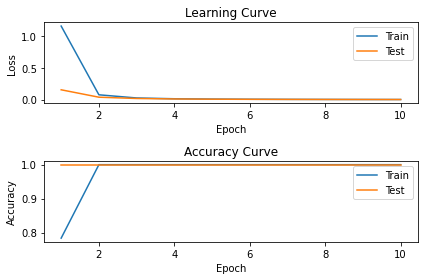

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader



class Vocab:
    def __init__(self):
        self.token_to_idx = {}
        self.idx_to_token = []
        self.add_token('<PAD>')

    def add_token(self, token):
        if token not in self.token_to_idx:
            self.token_to_idx[token] = len(self.idx_to_token)
            self.idx_to_token.append(token)

    def token_to_index(self, token):
        return self.token_to_idx.get(token, self.token_to_idx['<PAD>'])

    def index_to_token(self, index):
        if 0 <= index < len(self.idx_to_token):
            return self.idx_to_token[index]
        return None

    def __len__(self):
        return len(self.idx_to_token)


class SurnamesDataset(Dataset):
    def __init__(self, file_path, vocab):
        self.vocab = vocab
        self.data = []
        self.max_seq_len = 0

        with open(file_path, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                surname = row['surname']
                nationality = row['nationality']
                tokenized_surname = [self.vocab.token_to_index(char) for char in surname]
                self.data.append((tokenized_surname, nationality))

                self.max_seq_len = max(self.max_seq_len, len(tokenized_surname))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        tokenized_surname, nationality = self.data[index]
        padded_surname = tokenized_surname + [self.vocab.token_to_index('<PAD>')] * (self.max_seq_len - len(tokenized_surname))
        tensor_surname = torch.tensor(padded_surname)
        tensor_nationality = torch.tensor(self.vocab.token_to_index(nationality))

        return tensor_surname, tensor_nationality


class Classifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_classes):
        super(Classifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, num_classes)

    def forward(self, x):
        embedded = self.embedding(x) 
        pooled = embedded.mean(dim=1)  
        logits = self.fc(pooled) 
        return logits


vocab = Vocab()

file_path = 'surnames.csv'

dataset = SurnamesDataset(file_path, vocab)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=42)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Dataset size: {len(dataset)}")
print(f"Max sequence length: {dataset.max_seq_len}")
print(f"Vocab size: {len(vocab)}")

vocab_size = len(vocab)
embedding_dim = 32
num_classes = len(set([x[1] for x in dataset.data]))

model = Classifier(vocab_size, embedding_dim, num_classes)
batch_size = 64
learning_rate = 0.001
num_epochs = 10


dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_learning_curve = []
train_accuracy_curve = []
test_learning_curve = []
test_accuracy_curve = []

for epoch in range(num_epochs):

    train_epoch_loss = 0.0
    train_correct = 0
    train_total = 0

    model.train()

    for batch in train_dataloader:
        surnames, nationalities = batch
        optimizer.zero_grad()
        logits = model(surnames)
        loss = criterion(logits, nationalities)
        loss.backward()
        optimizer.step()

        train_epoch_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        train_total += nationalities.size(0)
        train_correct += (predicted == nationalities).sum().item()

    train_avg_loss = train_epoch_loss / len(train_dataloader)
    train_accuracy = train_correct / train_total
    train_learning_curve.append(train_avg_loss)
    train_accuracy_curve.append(train_accuracy)

    test_epoch_loss = 0.0
    test_correct = 0
    test_total = 0

    model.eval()  

    with torch.no_grad():
        for batch in test_dataloader:
            surnames, nationalities = batch
            logits = model(surnames)
            loss = criterion(logits, nationalities)

            test_epoch_loss += loss.item()

            _, predicted = torch.max(logits, 1)
            test_total += nationalities.size(0)
            test_correct += (predicted == nationalities).sum().item()

    test_avg_loss = test_epoch_loss / len(test_dataloader)
    test_accuracy = test_correct / test_total
    test_learning_curve.append(test_avg_loss)
    test_accuracy_curve.append(test_accuracy)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_avg_loss}, Train Accuracy: {train_accuracy}, '
          f'Test Loss: {test_avg_loss}, Test Accuracy: {test_accuracy}')


plt.subplot(2, 1, 1)
plt.plot(range(1, num_epochs+1), train_learning_curve, label='Train')
plt.plot(range(1, num_epochs+1), test_learning_curve, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(range(1, num_epochs+1), train_accuracy_curve, label='Train')
plt.plot(range(1, num_epochs+1), test_accuracy_curve, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
test_surnames = [
    "Сhernov", "Kisilev", "Shpeka", "Martishenya", "Lopez",
    "Miller", "Wang", "Martinez", "Lee", "Taylor",
    "Hernandez", "Brown", "Li", "Gonzalez", "Clark",
    "Rodriguez", "Anderson", "Gomez", "Lewis", "Harris"
]
test_nationalities = [
    "Russian", "Russian", "Russian", "Russian", "Spanish",
    "English", "Chinese", "Spanish", "Korean", "English",
    "Spanish", "English", "Chinese", "Spanish", "English",
    "Spanish", "English", "Spanish", "English", "English"
]

# Преобразование фамилий в тензоры и паддинг
sample_tensors = [torch.tensor([vocab.token_to_index(char) for char in surname]) for surname in test_surnames]
padded_tensors = [torch.cat([tensor, torch.tensor([vocab.token_to_index('<PAD>')] * (dataset.max_seq_len - len(tensor)))]) for tensor in sample_tensors]
input_tensors = torch.stack(padded_tensors)

# Получение предсказаний модели
model.eval()
with torch.no_grad():
    logits = model(input_tensors)
    _, predictions = torch.max(logits, 1)

# Расчет точности
correct = sum(predictions == torch.tensor([vocab.token_to_index(nationality) for nationality in test_nationalities]))
accuracy = correct.item() / len(test_surnames) * 100

print(f"Accuracy: {accuracy}%")

Accuracy: 100.0%


3. Классификация обзоров на фильмы (ConvNet)
Датасет: https://disk.yandex.ru/d/tdinpb0nN_Dsrg

2.1 Создайте набор данных на основе файлов polarity/positive_reviews.csv (положительные отзывы) и polarity/negative_reviews.csv (отрицательные отзывы). Разбейте на обучающую и тестовую выборку.

токен = слово
данные для обучения в датасете представляются в виде последовательности индексов токенов
словарь создается на основе только обучающей выборки. Для корректной обработки ситуаций, когда в тестовой выборке встретится токен, который не хранится в словаре, добавьте в словарь специальный токен <UNK>
добавьте предобработку текста

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

with open('positive_reviews.txt', 'r', encoding='utf-8') as file:
    positive_reviews = file.readlines()

with open('negative_reviews.txt', 'r', encoding='utf-8') as file:
    negative_reviews = file.readlines()

positive_labels = [1] * len(positive_reviews)
negative_labels = [0] * len(negative_reviews)

reviews = positive_reviews + negative_reviews
labels = positive_labels + negative_labels

train_data, test_data, train_labels, test_labels = train_test_split(reviews, labels, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
train_tokens = vectorizer.fit_transform(train_data)

test_tokens = vectorizer.transform(test_data)

print("Train data size:", train_tokens.shape)
print("Test data size:", test_tokens.shape)

Train data size: (8529, 16536)
Test data size: (2133, 16536)


In [3]:
positive_reviews = pd.read_csv('positive_reviews.txt', sep='\t', header=None, names=['text'])

positive_reviews = positive_reviews.assign(target=1)

negative_reviews = pd.read_csv('negative_reviews.txt', sep='\t', header=None, names=['text'])
negative_reviews = negative_reviews.assign(target=0)
reviews = pd.concat([positive_reviews, negative_reviews], ignore_index=True)

In [4]:
tokenizer = nltk.tokenize.word_tokenize
reviews['text'] = reviews['text'].astype(str)

reviews['text'] = reviews['text'].apply(tokenizer)

train_data, test_data, train_labels, test_labels = train_test_split(
    reviews['text'], reviews['target'], test_size=0.2, random_state=42
)
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
vocab = set()

for text in train_data:
    tokens = [token.lower() for token in text if token.lower() not in stopwords]
    vocab.update(tokens)
vocab.add('<UNK>')

word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}

train_sequences = [[word2idx.get(token.lower(), word2idx['<UNK>']) for token in text] for text in train_data]
test_sequences = [[word2idx.get(token.lower(), word2idx['<UNK>']) for token in text] for text in test_data]

print("Пример обработанного текста:")
print(train_data.iloc[0])
print("Пример последовательности индексов:")
print(train_sequences[0])

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Пример обработанного текста:
['rarely', 'has', 'skin', 'looked', 'as', 'beautiful', ',', 'desirable', ',', 'even', 'delectable', ',', 'as', 'it', 'does', 'in', 'trouble', 'every', 'day', '.']
Пример последовательности индексов:
[17933, 13214, 3819, 15731, 13214, 3994, 6383, 9156, 6383, 5012, 7884, 6383, 13214, 13214, 13214, 13214, 8352, 7116, 14008, 12184]


2.2. Обучите классификатор.

Для преобразования последовательности индексов в последовательность векторов используйте nn.Embedding

подберите адекватную размерность вектора эмбеддинга:
модуль nn.Embedding обучается
Используйте одномерные свертки и пулинг (nn.Conv1d, nn.MaxPool1d)

обратите внимание, что nn.Conv1d ожидает на вход трехмерный тензор размерности (batch, embedding_dim, seq_len)

In [15]:
import nltk
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

tokenizer = nltk.tokenize.word_tokenize

reviews['text'] = reviews['text'].astype(str)

reviews['text'] = reviews['text'].apply(tokenizer)

train_data, test_data, train_labels, test_labels = train_test_split(
    reviews['text'], reviews['target'], test_size=0.2, random_state=42
)

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
vocab = set()

for text in train_data:
    tokens = [token.lower() for token in text if token.lower() not in stopwords]
    vocab.update(tokens)
vocab.add('<UNK>')
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}
train_sequences = [[word2idx.get(token.lower(), word2idx['<UNK>']) for token in text] for text in train_data]
test_sequences = [[word2idx.get(token.lower(), word2idx['<UNK>']) for token in text] for text in test_data]
max_seq_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_sequences = [seq + [0] * (max_seq_length - len(seq)) for seq in train_sequences]
test_sequences = [seq + [0] * (max_seq_length - len(seq)) for seq in test_sequences]
train_sequences = torch.tensor(train_sequences, dtype=torch.long)
test_sequences = torch.tensor(test_sequences, dtype=torch.long)
train_labels = torch.tensor(train_labels.values, dtype=torch.long)
test_labels = torch.tensor(test_labels.values, dtype=torch.long)

train_dataset = TensorDataset(train_sequences, train_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(test_sequences, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
                  
class Classifier(nn.Module):
    def __init__(self, embedding_dim, num_classes):
        super(Classifier, self).__init__()
        self.embedding = nn.Embedding(len(vocab), embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 128, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc = nn.Linear(128 * ((max_seq_length - 2) // 2), num_classes)
    
    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(0, 2, 1)  
        hidden = self.conv1(embedded)
        hidden = torch.relu(hidden)
        hidden = self.pool(hidden)
        hidden = hidden.view(hidden.size(0), -1) 
        output = self.fc(hidden)
        return output

embedding_dim = 100
num_classes = 2
model = Classifier(embedding_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

model.eval()
test_predictions = []
with torch.no_grad():
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.cpu().numpy())

test_accuracy = (test_predictions == test_labels.numpy()).mean()
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10, Loss: 1.5771
Epoch 2/10, Loss: 0.6587
Epoch 3/10, Loss: 0.6019
Epoch 4/10, Loss: 0.4905
Epoch 5/10, Loss: 0.3875
Epoch 6/10, Loss: 0.3230
Epoch 7/10, Loss: 0.2102
Epoch 8/10, Loss: 0.1383
Epoch 9/10, Loss: 0.0984
Epoch 10/10, Loss: 0.0578
Test Accuracy: 64.37%


In [16]:
model.eval()
test_outputs = model(test_sequences)
_, test_predicted = torch.max(test_outputs, 1)
test_accuracy = (test_predicted == test_labels).sum().item() / len(test_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')
positive_review = """Your work the past few weeks has been amazing! You really care about your work and you seem to really take the time to do it the best you can. I love that you went out of your way to ask the client what their preferences were. I’m excited to see your development in this job and the company!"""
negative_review = "I'm very disappointed with this product. It doesn't work as advertised."
positive_sequence = [word2idx.get(token.lower(), word2idx['<UNK>']) for token in tokenizer(positive_review)]
negative_sequence = [word2idx.get(token.lower(), word2idx['<UNK>']) for token in tokenizer(negative_review)]
positive_sequence = positive_sequence + [0] * (max_seq_length - len(positive_sequence))
negative_sequence = negative_sequence + [0] * (max_seq_length - len(negative_sequence))

positive_sequence = torch.tensor(positive_sequence, dtype=torch.long).unsqueeze(0)
negative_sequence = torch.tensor(negative_sequence, dtype=torch.long).unsqueeze(0)

positive_output = model(positive_sequence)
negative_output = model(negative_sequence)

positive_predicted_class = bool(torch.argmax(positive_output))
negative_predicted_class = bool(torch.argmax(negative_output))

print(f'Positive Review Predicted Class: {positive_predicted_class}')
print(f'Negative Review Predicted Class: {negative_predicted_class}')

Test Accuracy: 0.6437
Positive Review Predicted Class: True
Negative Review Predicted Class: False
